# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [8]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [250]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [252]:
data = data.drop(['Location','Unnamed: 0','New_Price','Name','Mileage','Engine','Power'], axis=1)
data = data.dropna(axis=0)

In [253]:
data

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price
0,2010,72000,CNG,Manual,First,5.0,1.75
1,2015,41000,Diesel,Manual,First,5.0,12.50
2,2011,46000,Petrol,Manual,First,5.0,4.50
3,2012,87000,Diesel,Manual,First,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,5.0,17.74
...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,5.0,4.75
6015,2015,100000,Diesel,Manual,First,5.0,4.00
6016,2012,55000,Diesel,Manual,Second,8.0,2.90
6017,2013,46000,Petrol,Manual,First,5.0,2.65


In [254]:
data_encoding_col = data.select_dtypes(include=['object'])
data_encoding_col
data=data.select_dtypes(include=['int','float64'])
data

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74
...,...,...,...,...
6014,2014,27365,5.0,4.75
6015,2015,100000,5.0,4.00
6016,2012,55000,8.0,2.90
6017,2013,46000,5.0,2.65


In [255]:
for col in data_encoding_col.columns:
    data_encoding=pd.get_dummies(data_encoding_col[col])
    data_encoding
    data=data.join(data_encoding)
data

,Year,Kilometers_Driven,Seats,Price,CNG,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,2010,72000,5.0,1.75,True,False,False,False,False,False,True,True,False,False,False
1,2015,41000,5.0,12.50,False,True,False,False,False,False,True,True,False,False,False
2,2011,46000,5.0,4.50,False,False,False,False,True,False,True,True,False,False,False
3,2012,87000,7.0,6.00,False,True,False,False,False,False,True,True,False,False,False
4,2013,40670,5.0,17.74,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,5.0,4.75,False,True,False,False,False,False,True,True,False,False,False
6015,2015,100000,5.0,4.00,False,True,False,False,False,False,True,True,False,False,False
6016,2012,55000,8.0,2.90,False,True,False,False,False,False,True,False,False,True,False
6017,2013,46000,5.0,2.65,False,False,False,False,True,False,True,True,False,False,False


In [256]:
X = data[data.columns.difference(['Price'])]
y = data['Price']

In [257]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [258]:
X = standard_scaling(X, X.columns)

In [259]:
X

,Automatic,CNG,Diesel,Electric,First,Fourth & Above,Kilometers_Driven,LPG,Manual,Petrol,Seats,Second,Third,Year
0,-0.633254,10.281753,-1.071570,-0.018294,0.467457,-0.036606,0.145609,-0.040934,0.633254,-0.911927,-0.344611,-0.435497,-0.137548,-1.043055
1,-0.633254,-0.097243,0.933054,-0.018294,0.467457,-0.036606,-0.193028,-0.040934,0.633254,-0.911927,-0.344611,-0.435497,-0.137548,0.496820
2,-0.633254,-0.097243,-1.071570,-0.018294,0.467457,-0.036606,-0.138409,-0.040934,0.633254,1.096396,-0.344611,-0.435497,-0.137548,-0.735080
3,-0.633254,-0.097243,0.933054,-0.018294,0.467457,-0.036606,0.309466,-0.040934,0.633254,-0.911927,2.128067,-0.435497,-0.137548,-0.427105
4,1.578880,-0.097243,0.933054,-0.018294,-2.138877,-0.036606,-0.196632,-0.040934,-1.578880,-0.911927,-0.344611,2.295842,-0.137548,-0.119130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,-0.633254,-0.097243,0.933054,-0.018294,0.467457,-0.036606,-0.341973,-0.040934,0.633254,-0.911927,-0.344611,-0.435497,-0.137548,0.188845
6015,-0.633254,-0.097243,0.933054,-0.018294,0.467457,-0.036606,0.451475,-0.040934,0.633254,-0.911927,-0.344611,-0.435497,-0.137548,0.496820
6016,-0.633254,-0.097243,0.933054,-0.018294,-2.138877,-0.036606,-0.040095,-0.040934,0.633254,-0.911927,3.364406,2.295842,-0.137548,-0.427105
6017,-0.633254,-0.097243,-1.071570,-0.018294,0.467457,-0.036606,-0.138409,-0.040934,0.633254,1.096396,-0.344611,-0.435497,-0.137548,-0.119130


In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [261]:
model = linear_model.LinearRegression()
model_ = model.fit(X_train, y_train)
pred = model.predict(X_test)

In [262]:
print(model_.intercept_)
print(model_.coef_)

9.396637776789984
[ 5.82554254e+12  2.58403693e+13  1.33789234e+14  4.90558861e+12
 -1.89235045e+14 -1.80335178e+13 -2.38125526e+00  1.09618837e+13
  5.82554254e+12  1.33542847e+14  4.44614236e-01 -1.80574298e+14
 -6.65912533e+13  2.09992339e+00]


In [263]:
pred

array([23.72240143, -1.37936341,  9.72582869, ...,  9.29028181,
        0.93580821,  0.70338633])

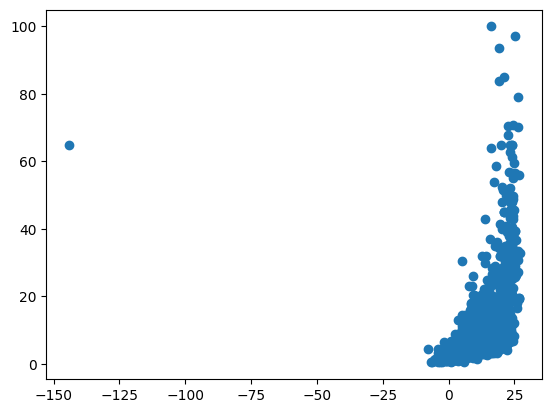

In [264]:
plt.scatter(pred,y_test)

In [265]:
print(model_.score(X_train, y_train))
print(model_.score(X_test, y_test))

0.4589116359095561
0.28411169908584766
